# EDA - Airbnb in New York

**(EN)** Exploratory data analysis in continuation provides an insight into Airbnb listings in New York.

Dataset: airbnb_nyc CSV file, collected by Airbnb – it includes information about hosts and their listings, price, boroughs, neighborhoods, number of reviews, minimum nights, and more.

Objective: dive into an Airbnb dataset to learn about rental options and how they are distributed around the city's five boroughs: Manhattan, Brooklyn, Bronx, Queens, and Staten Island.

Main questions:
1. Do prices diferrentiate by neighbourhood and the type of room?
2. Which Type of room is the most present in New York? Does it differante in different neighbourhood groups?
3. How is with the availability of rooms in different neighbourhood groups?
4. How is the distribution of minimum_nights? Does it differentiate by neighbourhoods and room types?

Dataset is in English so the graphs are presented in English as well, also the inbetween comments, while conclusions are written in both languages.

**(ESP)** El análisis de datos exploratorios a continuación proporciona una idea de los listados de Airbnb en Nueva York.

Conjunto de datos: archivo CSV airbnb_nyc, recopilado por Airbnb – incluye información sobre anfitriones y sus listados, precios, distritos, vecindarios, cantidad de reseñas, noches mínimas y más.

Objetivo: sumergirse en un conjunto de datos de Airbnb para conocer las opciones de alquiler y cómo se distribuyen en los cinco distritos de la ciudad: Manhattan, Brooklyn, Bronx, Queens y Staten Island.

Preguntas principales:
1. ¿Los precios difieren según el distrito y el tipo de habitación?
2. ¿Qué tipo de habitación es la más presente en Nueva York? ¿Difiere en diferentes distritos?
3. ¿Cómo es la disponibilidad de habitaciones en los diferentes distritos?
4. ¿Cómo es la distribución de mínimo_noches? ¿Se diferencia por distritos y tipos de habitación?

El conjunto de datos está en inglés, por lo que los gráficos también se presentan en inglés, también los comentarios intermedios, mientras que las conclusiones están escritas en ambos idiomas.

## Data Download

In [ ]:
#Importing libraries
import numpy as np
from numpy import mean
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from skimage.io import imread

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("airbnb_nyc.csv")

## Data preparation and cleaning

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
#unique values
df['id'].nunique()

48895

In [ ]:
#missing values
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
#missing values%
missing_perc=df.isna().sum()/len(df)
missing_perc

id                                0.000000
name                              0.000327
host_id                           0.000000
host_name                         0.000429
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.205583
reviews_per_month                 0.205583
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

In [ ]:
#drop unnecessary values
#hostname, name, many null values, not important for analysis
#lastreview any null values, not required for our analysis

df.drop(['id', 'name', 'host_name','reviews_per_month','last_review','calculated_host_listings_count'], axis=1, inplace=True )

In [ ]:
#check if we have duplicated values

df.duplicated().sum()

0

In [ ]:
print("The dataset has {} rows and {} columns and".format(*df.shape))
print("it contains {} duplicates.".format(df.duplicated().sum()))

The dataset has 48895 rows and 10 columns and
it contains 0 duplicates.


## Exploratory analysis and visualization

In [ ]:
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   host_id              48895 non-null  int64  
 1   neighbourhood_group  48895 non-null  object 
 2   neighbourhood        48895 non-null  object 
 3   latitude             48895 non-null  float64
 4   longitude            48895 non-null  float64
 5   room_type            48895 non-null  object 
 6   price                48895 non-null  int64  
 7   minimum_nights       48895 non-null  int64  
 8   number_of_reviews    48895 non-null  int64  
 9   availability_365     48895 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 3.7+ MB


We decided not to focus on reviews and hosts in our EDA, but rather on price, availibility and minimum nights per neighbourhood group or room type since it is more essential for our analysis - we are looking into popularity of room types and what influences it.

Decidimos no centrarnos en las reseñas y los anfitriones en nuestra EDA, sino en el precio, la disponibilidad y las noches mínimas por grupo de vecindario o tipo de habitación, ya que es más esencial para nuestro análisis: estamos investigando la popularidad de los tipos de habitación y qué la influye.

**OK**

In [ ]:
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,365.000000


In [ ]:
len(df[df['price']==0]) #so 11 property/listings have 0 price listed.


11

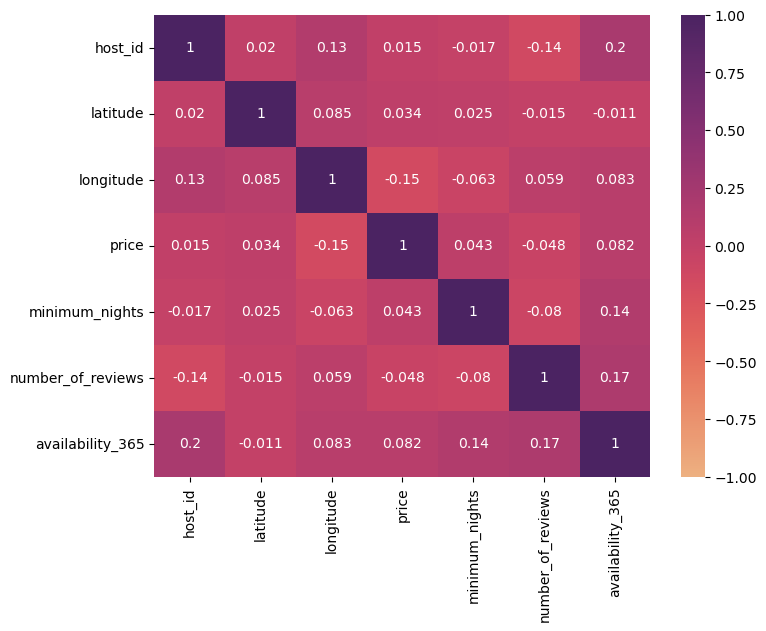

In [ ]:
#Here we are ploting a correlation matrix see how all the variables correlate with each other .

correlation = df.corr()
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation,linewidths=0, vmin=-1,annot=True, cmap="flare")

In [ ]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
len(df.neighbourhood_group.unique())

5

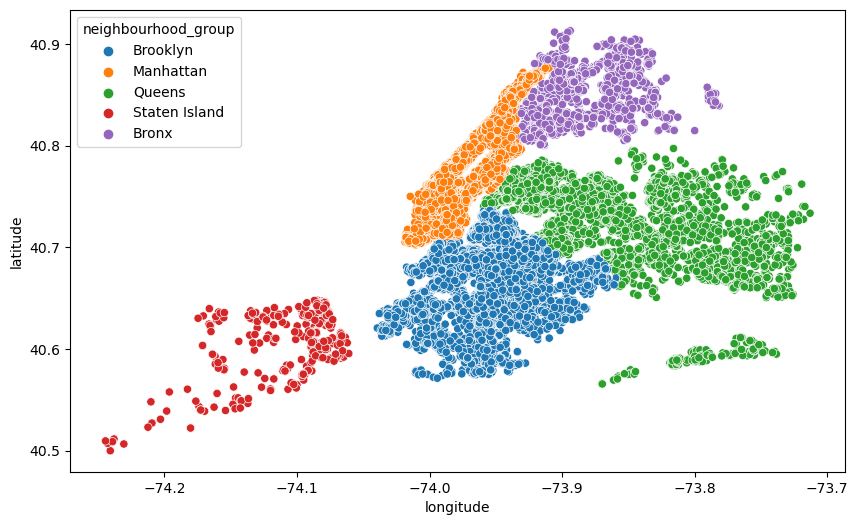

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.longitude,y=df.latitude,hue=df.neighbourhood_group);

#The below plot just decibes the demogrphic view of the entries in the data and also provides a clear view of the City.

## Ask & answer qs

**1. Do prices diferrentiate by neighbourhood and the type of room?**

**¿Los precios difieren según el distrito y el tipo de habitación?**

We will first look into price so we can get rid of outliers and continue with updated dataset. Other values by the context given are not in a need of cleaning of outliers.

<AxesSubplot:xlabel='price', ylabel='Density'>

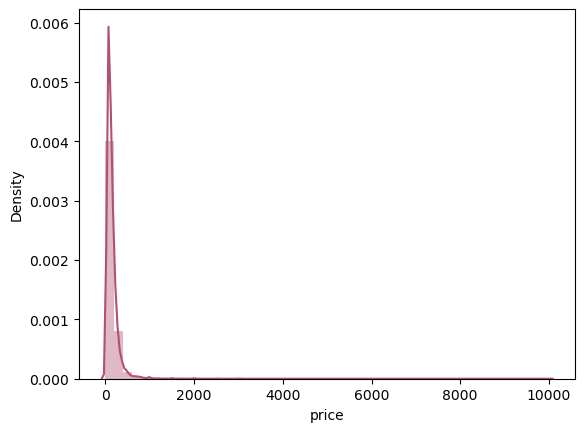

In [ ]:
#price distribution

sns.distplot(df['price'],hist=True, color="#B1516E")

In [ ]:
print(df["price"].skew(axis=0, skipna=True))
print(df["price"].kurt(axis=0, skipna=True))

19.118938995046033
585.6728788988286


Looks the skew and kurtosis came out very large. Since the skewness has value>1 it is highly skewed.

Also kurtosis looks high as well which indicates presence of good amount of outliers


<AxesSubplot:xlabel='minimum_nights', ylabel='price'>

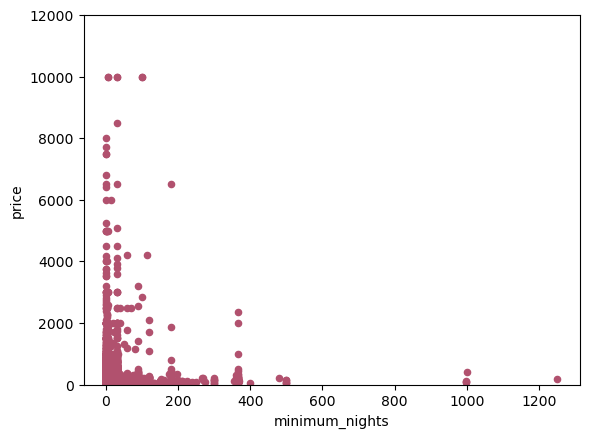

In [ ]:
# price vs minimum_nights

var='minimum_nights'

df1=pd.concat([df['price'],df[var]],axis=1)
df1.plot.scatter(x=var,y='price',ylim=(0,12000), color='#B1516E')


In [ ]:
#Looks many data points are clustured on 0 price range, 
#few have minimum nights for stay but price is 0 - looks like anomaly in price.

#there are many outliers as well that we will get rid off in continuation.

**OK**

<AxesSubplot:xlabel='price'>

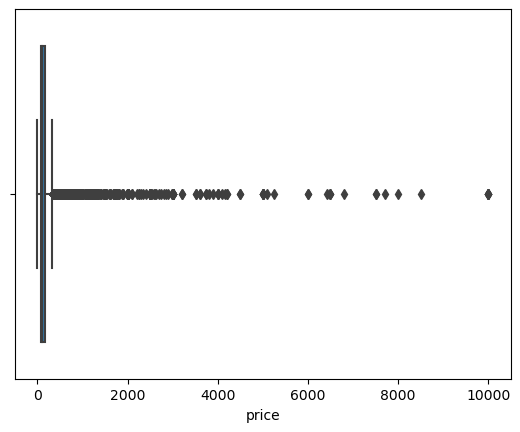

In [ ]:
sns.boxplot(df['price'])
#in the boxplot we can see the presence of many outliers in price.

**NOTA** Observaciones?

In [ ]:
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,365.000000


Removing Outliers using IQR approach! 

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

host_id              9.961239e+07
latitude             7.301500e-02
longitude            4.679500e-02
price                1.060000e+02
minimum_nights       4.000000e+00
number_of_reviews    2.300000e+01
availability_365     2.270000e+02
dtype: float64


In [ ]:
#writing a outlier function for removing outliers!
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 
 return lower_range,upper_range

In [ ]:
lower_bound,upper_bound = outlier_treatment(df['price'])

In [ ]:
df[(df.price < lower_bound) | (df.price > upper_bound)] 
#looking at the low and upper range outliers

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365
61,60278,Manhattan,Chelsea,40.74623,-73.99530,Entire home/apt,375,180,5,180
85,74303,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,7
103,93790,Manhattan,West Village,40.73096,-74.00319,Entire home/apt,500,4,46,243
114,72062,Manhattan,East Village,40.72540,-73.98157,Entire home/apt,350,2,7,298
121,119588,Brooklyn,South Slope,40.66499,-73.97925,Entire home/apt,400,2,16,216
...,...,...,...,...,...,...,...,...,...,...
48758,73211393,Queens,Long Island City,40.75508,-73.93258,Entire home/apt,350,2,0,364
48833,29741813,Manhattan,Financial District,40.70605,-74.01042,Entire home/apt,475,2,0,64
48839,274079964,Brooklyn,Sheepshead Bay,40.59866,-73.95661,Private room,800,1,0,23
48842,224171371,Manhattan,Chelsea,40.75204,-74.00292,Entire home/apt,350,1,0,9


In [ ]:
#subsetting only those rows having datapoints greater than lower range and lesser than upper range respectively
df_pnw1 = df[(df.price>lower_bound) & (df.price<upper_bound)]

In [ ]:
df_pnw1

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0
...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,9
48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,36
48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,27
48893,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,2


<AxesSubplot:xlabel='price'>

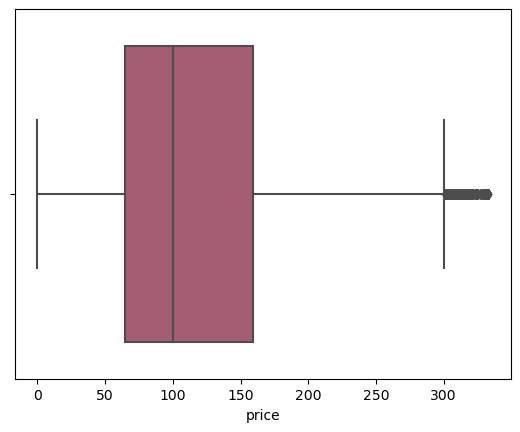

In [ ]:
sns.boxplot(df_pnw1["price"], color="#B1516E") #the boxplot for price now looks good without outliers!


In [ ]:
av_price = round(np.mean(df['price']),2)
print(f'The average price of a room is ${av_price}')

The average price of a room is $152.72


In [ ]:
#skewness and kurtosis
print("Skewness: %f" % df_pnw1['price'].skew())
print("Kurtosis: %f" % df_pnw1['price'].kurt())

Skewness: 0.922925
Kurtosis: 0.169543


<AxesSubplot:xlabel='price', ylabel='Density'>

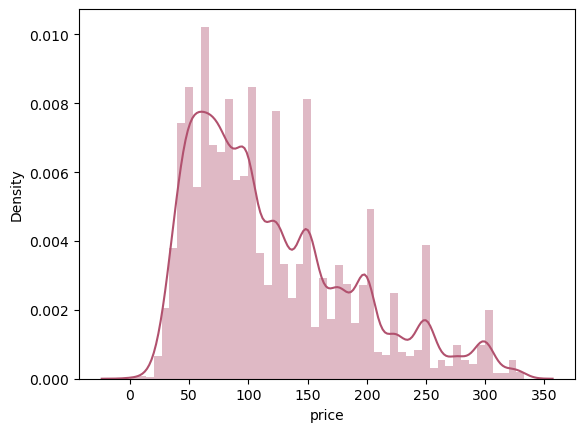

In [ ]:
#check for the distribution of this new price as well.

sns.distplot(df_pnw1['price'], color="#B1516E")

<span style="color:red">In continuation we will use the new data without the low and upper range outliers.</span>

**NOTA** Crees que con ese filtro los resultados serán más concluyentes?

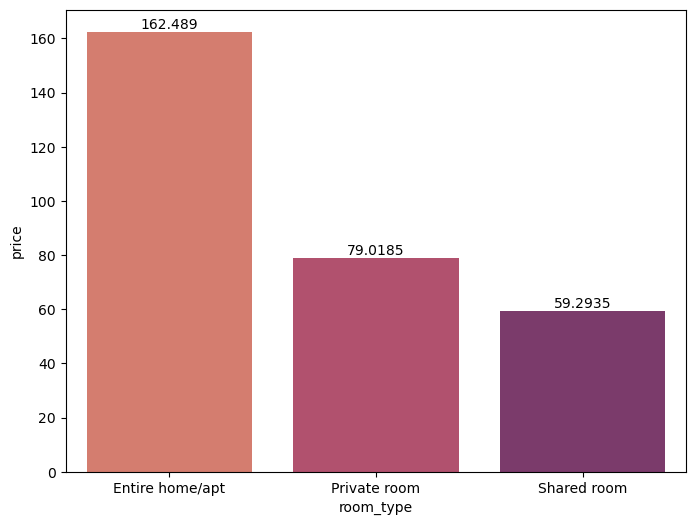

In [ ]:
##mean price for room type
rtype = df_pnw1.groupby('room_type', as_index=False)[['price']].mean()

plt.figure(figsize=(8,6))
ax=sns.barplot(data=rtype, x=rtype['room_type'], y=rtype['price'], palette='flare')

for i in ax.containers:
    ax.bar_label(i,);

The above bar plot we see that the price of entire home/apt is more than any other room type, while shared room is the cheapest.

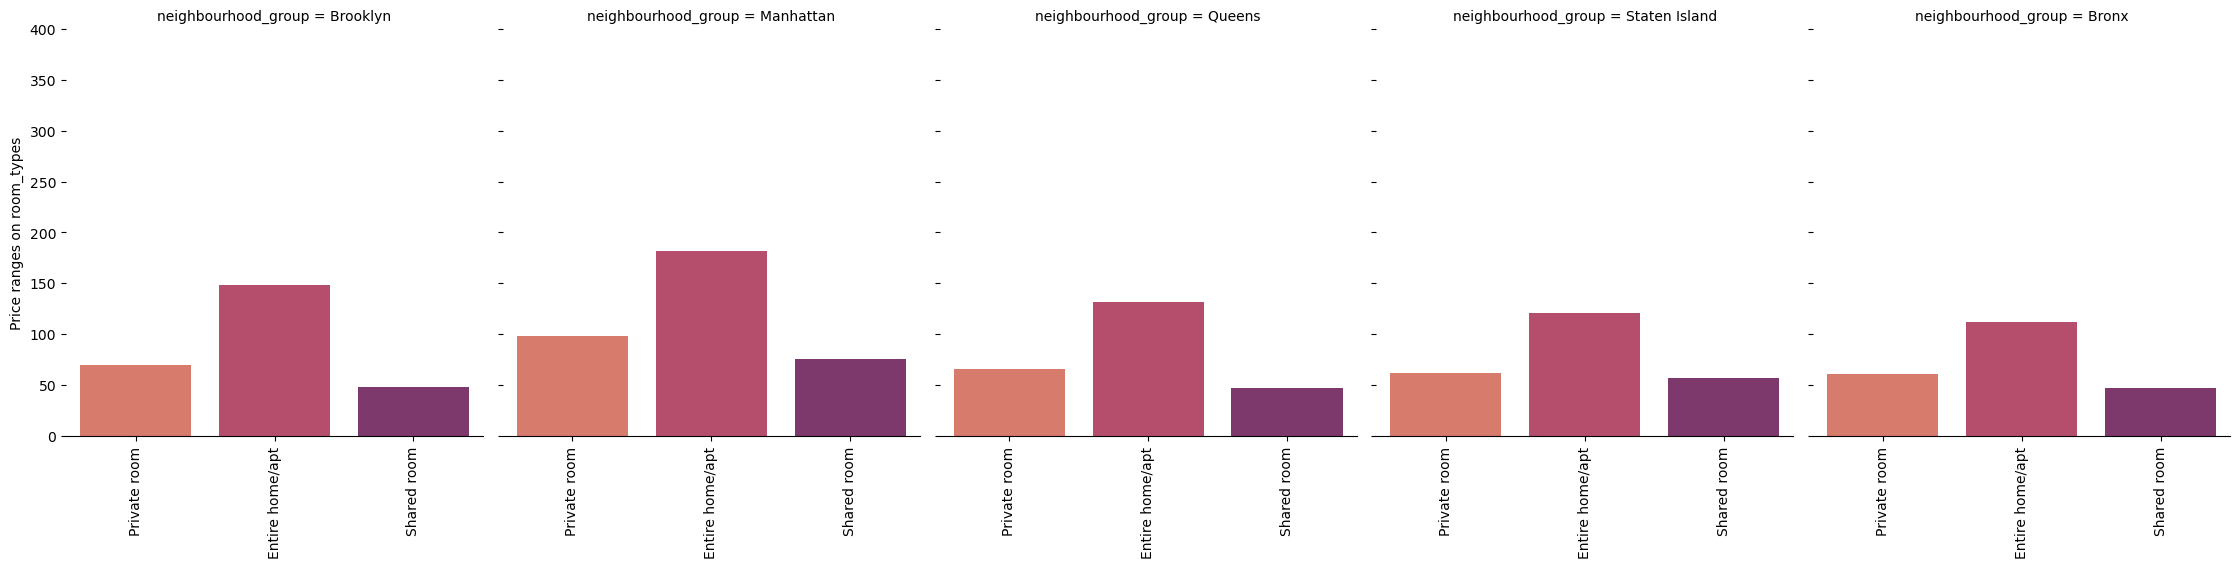

In [ ]:
g = sns.catplot(x="room_type", y="price", col="neighbourhood_group",
                data=df_pnw1, saturation=.8,
                kind="bar",ci=None,  aspect=.9, palette='flare')
(g.set_axis_labels("", "Price ranges on room_types")
  .set_xticklabels(["Private room", "Entire home/apt", "Shared room"],rotation=90)
  .set(ylim=(0, 400))
  .despine(left=True)) 

We see above that prices are generally high in Manhattan more than any other neighbourhood group.



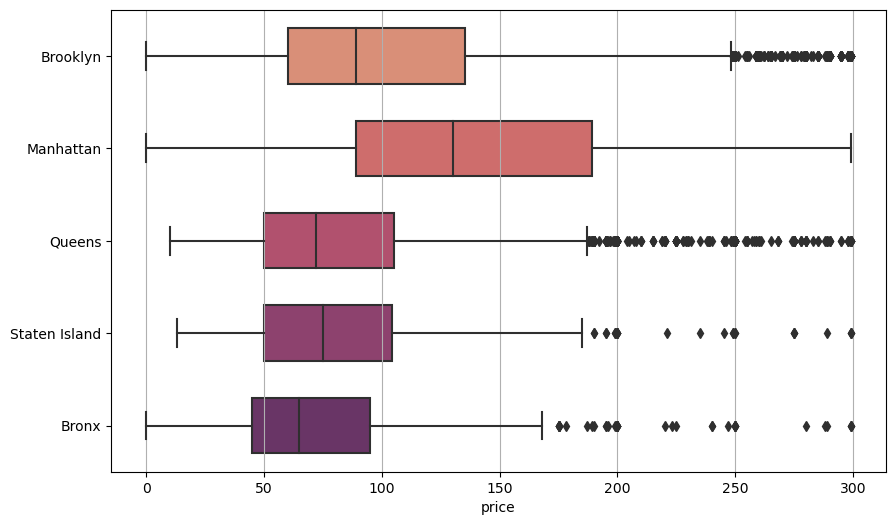

In [ ]:
#neighbourhood group with price
f, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(data=df_pnw1[df_pnw1['price']<300],y='neighbourhood_group',x='price',width=.6,palette='flare')


ax.xaxis.grid(True)
ax.set(ylabel="");

**OK** faltan comentarios

In [ ]:
#distribution of price (without extreme values) along neighbourhood groups
df_pnw1['neighbourhood_group'].value_counts()

Manhattan        19501
Brooklyn         19415
Queens            5567
Bronx             1070
Staten Island      365
Name: neighbourhood_group, dtype: int64

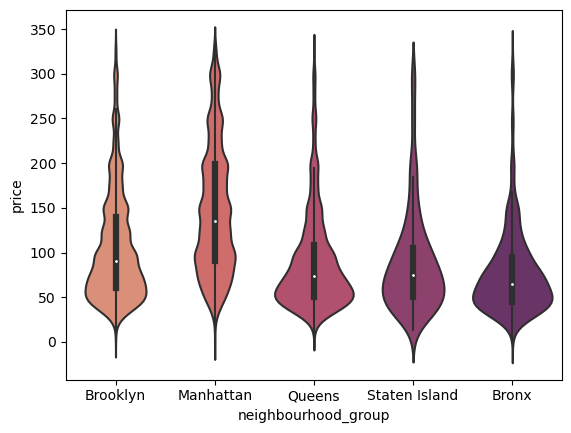

In [ ]:
#showing distribution of price again with violin graph to see the median aswell
ax= sns.violinplot(x='neighbourhood_group',y='price',data=df_pnw1, palette="flare")

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

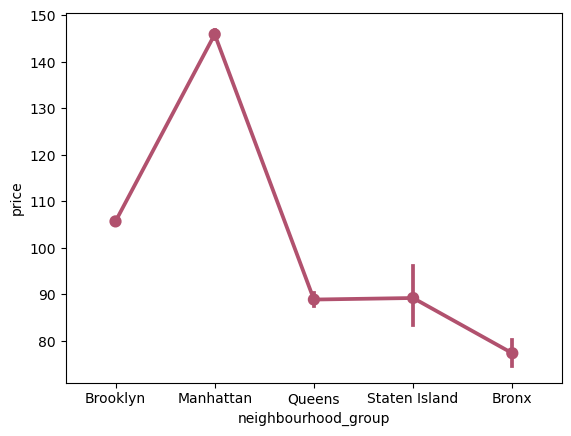

In [ ]:
#looking for the average price each neighbourhood group holds in a seaborn pointplot
sns.pointplot(x = 'neighbourhood_group', y='price', data=df_pnw1, estimator=mean, color="#B1516E")

We can see that Manhattan has the highest(the costliest) average of price ranging to ~150dollars/day followed by Brooklyn

Queens and Staten Island have same average price/day, while Bronx comes out to be the cheapest neighbourhood group in NYC.

In [ ]:
top_price = df_pnw1.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(20)
top_price

neighbourhood
Willowbrook           249.000000
Neponsit              237.000000
Breezy Point          213.333333
Tribeca               212.495327
NoHo                  205.290909
West Village          192.901235
Flatiron District     188.090909
Financial District    183.973926
Midtown               180.948381
Greenwich Village     179.853372
Mill Basin            179.750000
Murray Hill           179.559719
Chelsea               178.653319
Theater District      176.380165
DUMBO                 174.750000
Nolita                169.048889
Battery Park City     166.118644
Gramercy              164.549342
SoHo                  164.358209
Vinegar Hill          164.161290
Name: price, dtype: float64

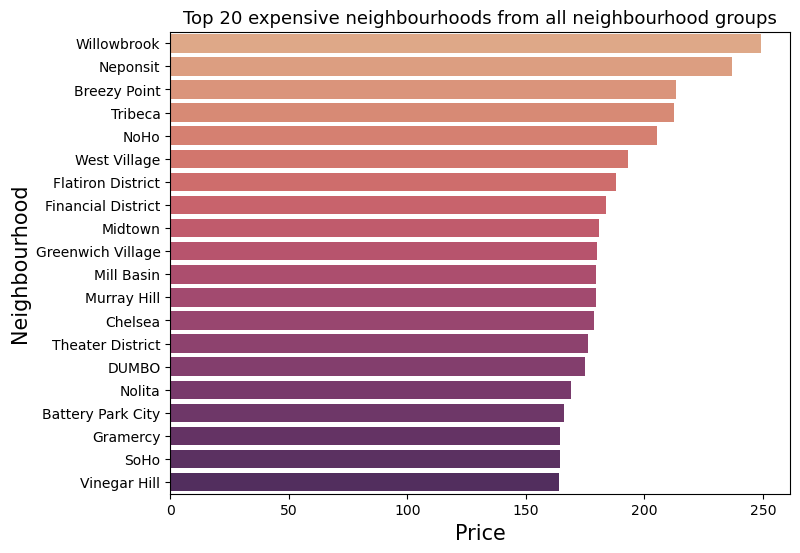

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

sns.barplot(data=df_pnw1, x=top_price, y=top_price.index, palette="flare")

plt.title("Top 20 expensive neighbourhoods from all neighbourhood groups", size=13)
plt.xlabel("Price", size=15)
plt.ylabel("Neighbourhood", size=15)

plt.show()

After removing outliers, Willowbrook is the most expensive neighbourhood in NYC with 249 as the mean price

**OK**

**2. Which Type of room is the most present in New York? Does it differante in different neighbourhood groups?**

**¿Qué tipo de habitación es la más presente en Nueva York? ¿Difiere entre distritos?**

In [ ]:
df_pnw1.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
df_pnw1['room_type'].value_counts()

Entire home/apt    22784
Private room       21996
Shared room         1138
Name: room_type, dtype: int64

In [ ]:
city_type = df_pnw1.groupby(['neighbourhood_group'])['room_type'].value_counts().unstack(0)
print(city_type)

neighbourhood_group  Bronx  Brooklyn  Manhattan  Queens  Staten Island
room_type                                                             
Entire home/apt        363      8942      11289    2022            168
Private room           648     10062       7747    3351            188
Shared room             59       411        465     194              9


In [ ]:
df_pnw1

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0
...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,9
48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,36
48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,27
48893,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,2


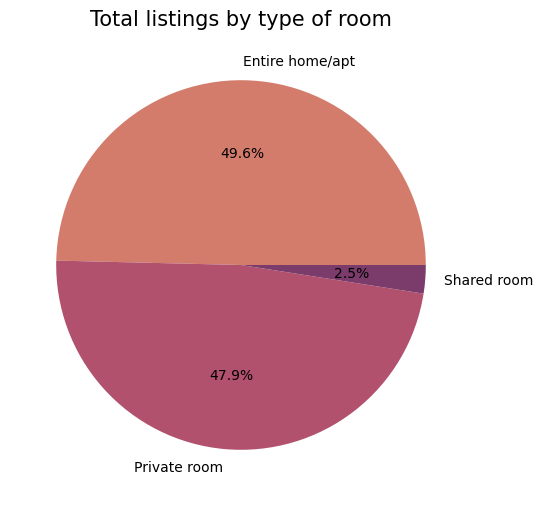

In [ ]:

labels = df_pnw1['room_type'].value_counts().index
sizes = df_pnw1['room_type'].value_counts().values
plt.figure(figsize = (6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors = ['#d47c6c','#b1516e','#7b3b6b'] )
plt.title("Total listings by type of room", color = 'black',fontsize = 15);

**NOTA** Comentarios?

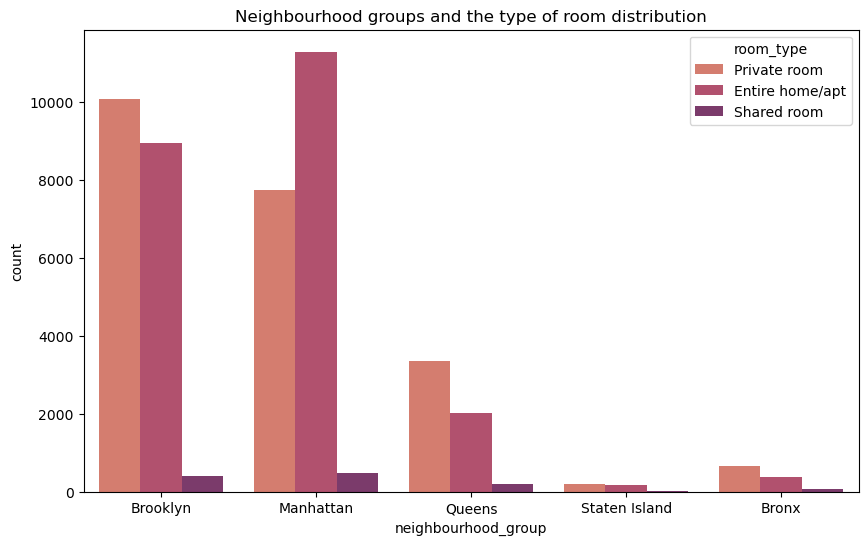

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_pnw1, x='neighbourhood_group',hue='room_type',palette='flare')
plt.title('Neighbourhood groups and the type of room distribution')
plt.show()

We see above that the highest room types in (Manhattan) represents Entire home/apt and the lowest room types in (Staten island) represents Shared room.

**3. How is with the availability of rooms in different neighbourhood groups?**

**¿Cómo es la disponibilidad de habitaciones en los diferentes distritos?**

<AxesSubplot:xlabel='room_type', ylabel='availability_365'>

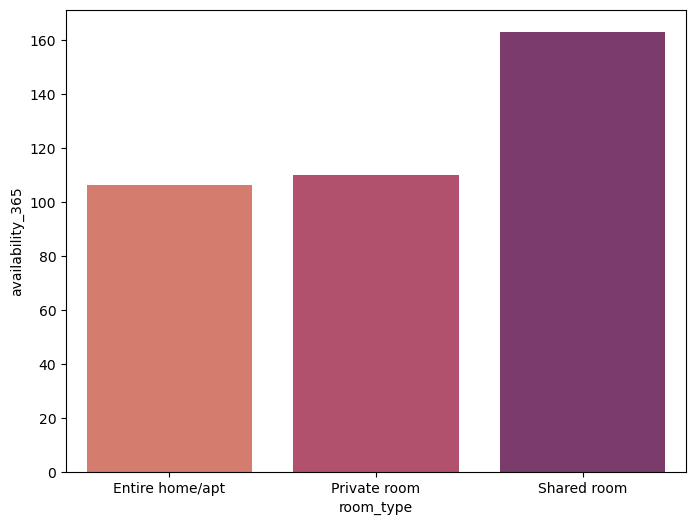

In [ ]:
# Airbnb dataset groupby room_type with 'availability_365'-mean
ngroup = df_pnw1.groupby('room_type', as_index=False)[['availability_365']].mean()

plt.figure(figsize=(8,6))
sns.barplot(data=ngroup, x=ngroup['room_type'], y=ngroup['availability_365'], palette='flare')



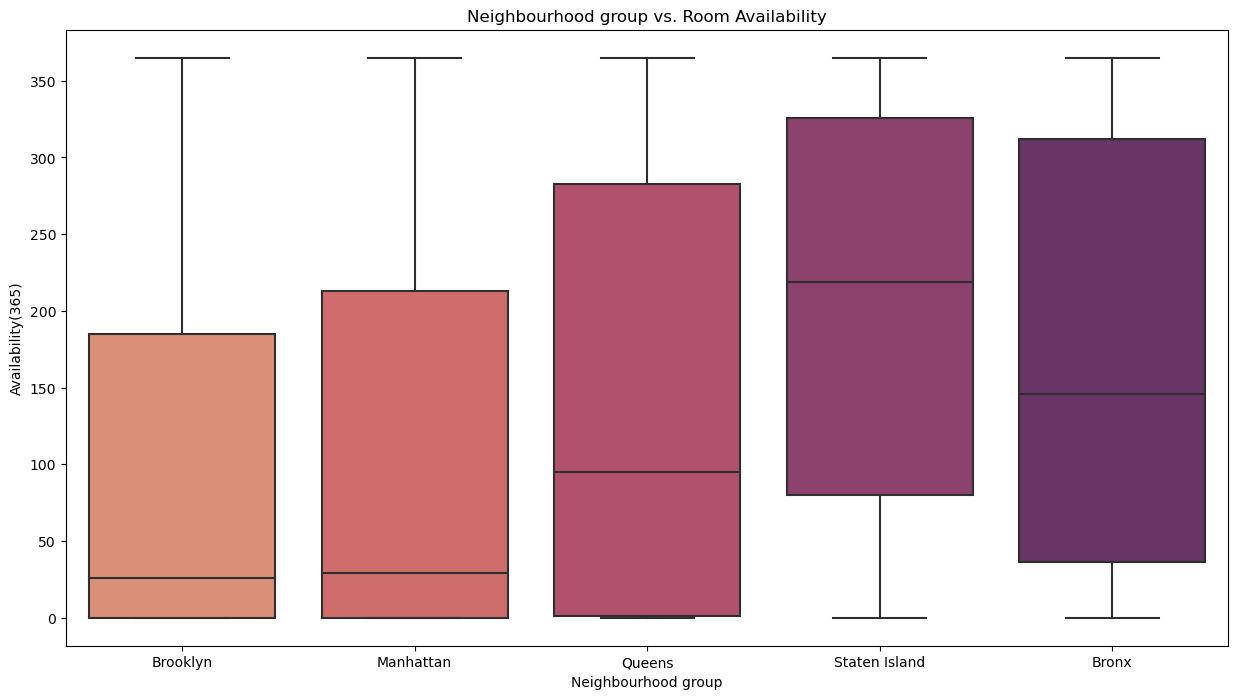

In [ ]:
#room_types and their relation with availability in different cities
f,ax = plt.subplots(figsize=(15,8))
ax=sns.boxplot(x='neighbourhood_group',y='availability_365',data=df_pnw1,palette="flare")
plt.title("Neighbourhood group vs. Room Availability")
plt.xlabel('Neighbourhood group')
plt.ylabel('Availability(365)')
plt.show()

Looking at the above categorical box plot we can infer that the listings in Staten Island seems to be more available throughout the year to more than 300 days. On an average, these listings are available to around 210 days every year followed by Bronx where every listings are available for 150 on an average every year

**BIEN**

**4. How is the distribution of minimum_nights? Does it differentiate by neighbourhoods and room types?**

**¿Cómo es la distribución de mínimo_noches? ¿Se diferencia por distritos y tipos de habitaciones?**

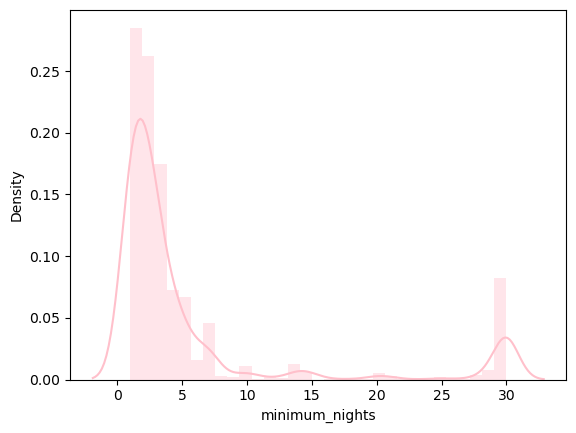

In [ ]:
#Nights Booked
sns.distplot(df_pnw1[(df_pnw1['minimum_nights'] <= 30) & (df_pnw1['minimum_nights'] > 0)]['minimum_nights'], bins=31,color ='pink')
plt.ioff()

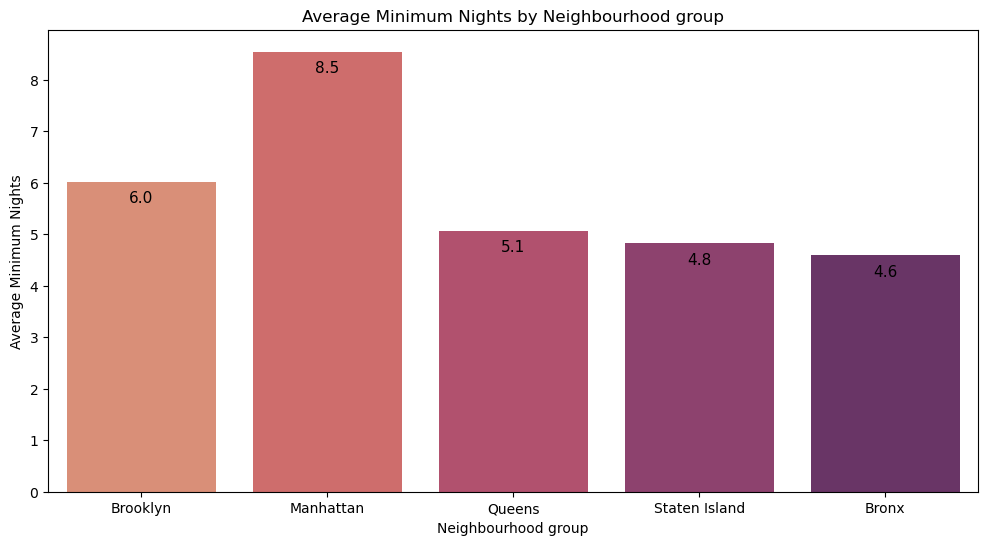

In [ ]:
# min nights per neighbourhood group
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="neighbourhood_group", y="minimum_nights", data=df_pnw1, palette="flare", ci=None)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', size = 11, 
                   xytext = (0, -12), textcoords = 'offset points')
plt.xlabel('Neighbourhood group')
plt.ylabel('Average Minimum Nights')
plt.title('Average Minimum Nights by Neighbourhood group')
plt.show()




Manhattan has the highest min nights from all neighbourhood groups

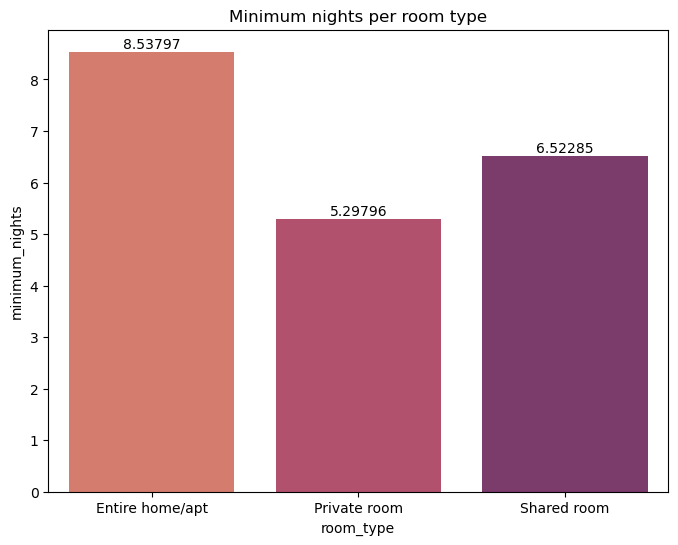

In [ ]:
#min nights per room type
rtype = df_pnw1.groupby('room_type', as_index=False)[['minimum_nights']].mean()

plt.figure(figsize=(8,6))
ax=sns.barplot(data=rtype, x=rtype['room_type'], y=rtype['minimum_nights'], palette='flare')

plt.title('Minimum nights per room type')

for i in ax.containers:
    ax.bar_label(i,);

The average of minimum nights by entire home/apartment is higher than other options.

## Conclusion


**(EN)** At the end of this analysis, we see that most customers do not prefer shared rooms, since the listings' number is comparably lower to other two categories, while availability is higher. Manhattan has the highest number of listings and is the most expensive borough (neighbourhood group), while Brooklyn has the second-highest number of listings and is the second most expensive borough for rentals. As expected, entire homes are the most expensive room type through all neighbourhood groups, as well as they have the highest minimum nights per stay, which could be due to higher cleaning costs.

**(ESP)** Al final de este análisis, vemos que la mayoría de los clientes no prefieren las habitaciones compartidas, ya que el número de listados es comparativamente más bajo que el de las otras dos categorías, mientras que la disponibilidad es más alta. Manhattan tiene el mayor número de listados y es el distrito (grupo de vecindario) más caro, mientras que Brooklyn tiene el segundo mayor número de listados y es el segundo distrito más caro para alquileres. Como era de esperar, las casas completas son el tipo de habitación más caro en todos los grupos de vecindarios, y también tienen el mínimo de noches por estadía más alto, lo que podría deberse a costos de limpieza más altos.

